# <center>Societe Generale Recruitment challenge</center>

### <div style="text-align: right"> By Vinod Kumar Reddy Salkuti </div>

#### Importing Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Opening the file and read first five lines

In [2]:
df = pd.read_csv('Online Retail.csv' , encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


##### General Information 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##### Obtain General Insights like shape,missing values,unique(countries,description,customers)

In [5]:
print("Total data points: ", df.shape[0])
print("Total missing values: {} - which is {:.2f}% of our total data".format(df.isnull().sum().sum(), (df.isnull().sum().sum()*100)/df.shape[0]))
print("Total unique Countries: ", df.Country.nunique())
print("Total unique description: ", df.Description.nunique())
print("Total Number of Unique customers: ",df.CustomerID.nunique())

Total data points:  541909
Total missing values: 136534 - which is 25.20% of our total data
Total unique Countries:  38
Total unique description:  4223
Total Number of Unique customers:  4372


#### Plotting unit Price

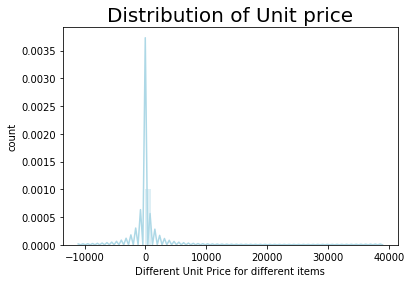

In [6]:
sns.distplot(df['UnitPrice'], color = 'lightblue')
plt.title('Distribution of Unit price', fontsize = 20)
plt.xlabel('Different Unit Price for different items')
plt.ylabel('count')
plt.show()

#### Top 10 Products Sold

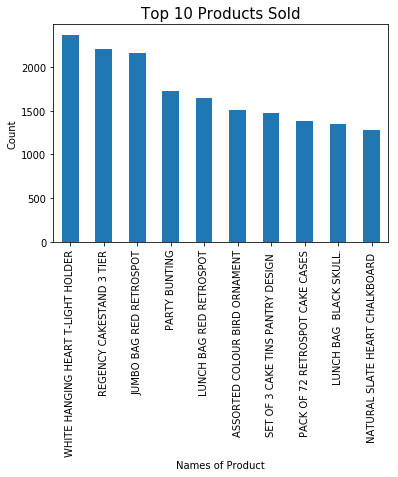

In [26]:
df['Description'].value_counts().head(10).plot.bar()
plt.title('Top 10 Products Sold', fontsize = 15)
plt.xlabel('Names of Product')
plt.ylabel('Count')
plt.show()

#### Plotting barchart to find Top 20 and Bottom 20 countires countwise

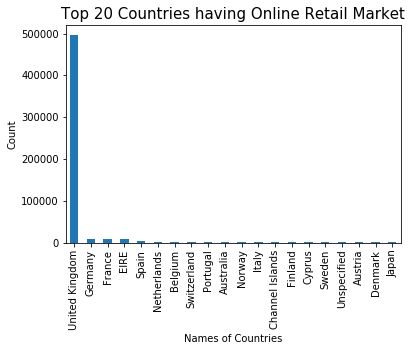

In [25]:
df['Country'].value_counts().head(20).plot.bar()
plt.title('Top 20 Countries having Online Retail Market', fontsize = 15)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

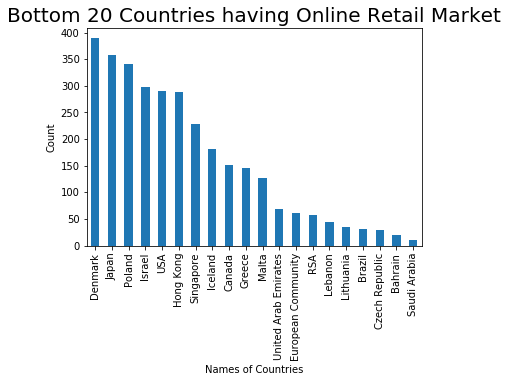

In [8]:
df['Country'].value_counts().tail(20).plot.bar()
plt.title('Bottom 20 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

#### NUmber of Products sold from Each Country

In [9]:
df['Quantity'].groupby(df['Country']).agg('sum')

Country
Australia                 83653
Austria                    4827
Bahrain                     260
Belgium                   23152
Brazil                      356
Canada                     2763
Channel Islands            9479
Cyprus                     6317
Czech Republic              592
Denmark                    8188
EIRE                     142637
European Community          497
Finland                   10666
France                   110480
Germany                  117448
Greece                     1556
Hong Kong                  4769
Iceland                    2458
Israel                     4353
Italy                      7999
Japan                     25218
Lebanon                     386
Lithuania                   652
Malta                       944
Netherlands              200128
Norway                    19247
Poland                     3653
Portugal                  16180
RSA                         352
Saudi Arabia                 75
Singapore                  5234


#### Having a look at the top 20 Countries in terms of Quantities according to the countries

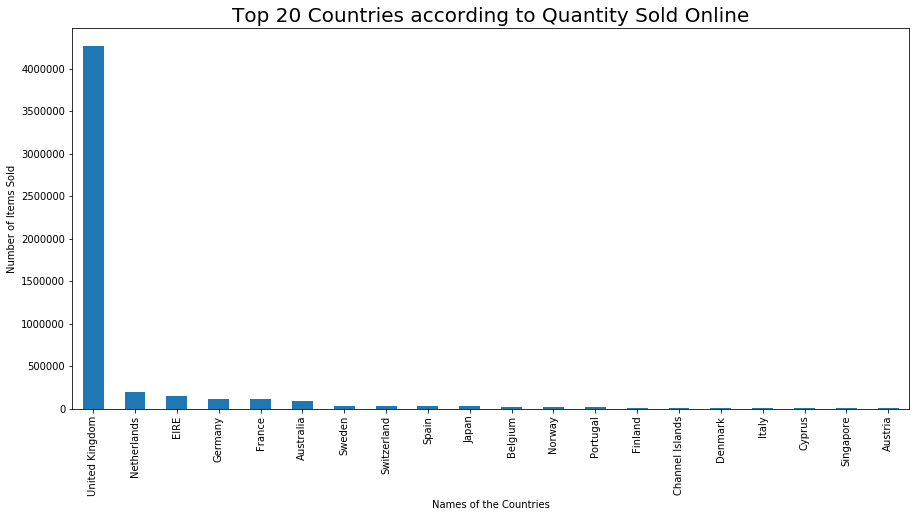

In [10]:
df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7))
plt.title('Top 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

##### Having a look at the bottom 20 Countries in terms of Quantities according to the countries

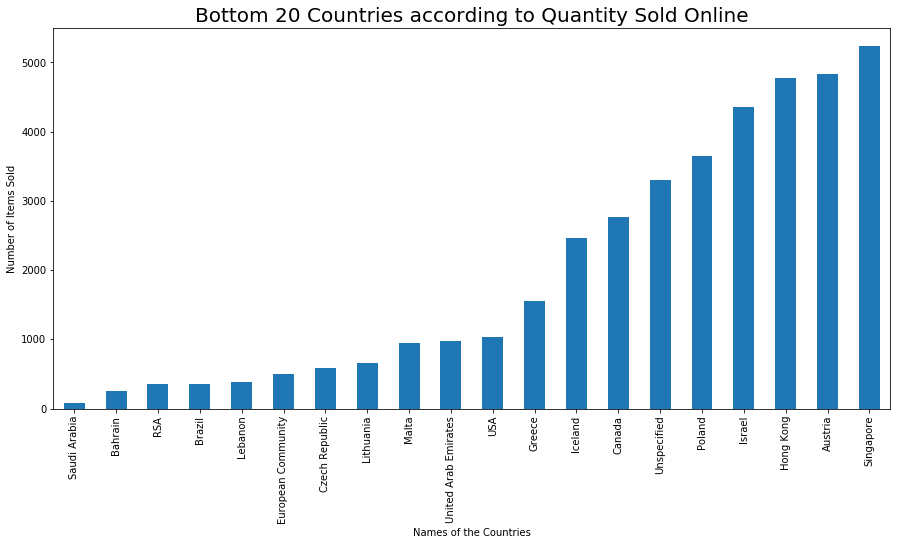

In [11]:
df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7))

plt.title('Bottom 20 Countries according to Quantity Sold Online', fontsize = 20)
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.show()

#### Adding a column to Dataset
We will add a column named sales to dataset which is a product of Unit price and Quantity                                        
sales = unitprice*quantity

In [12]:
df['Sales'] = df['UnitPrice'] * df['Quantity']

#### visualizing the sales in the entire globe


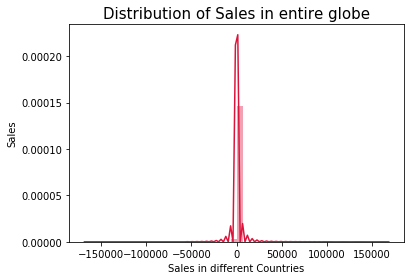

In [13]:
sns.distplot(df['Sales'], color = 'crimson')
plt.title('Distribution of Sales in entire globe', fontsize = 15)
plt.xlabel('Sales in different Countries')
plt.ylabel('Sales')
plt.show()

### Country Wise Sales

In [14]:
df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = False)

Country
United Kingdom          8.187806e+06
Netherlands             2.846615e+05
EIRE                    2.632768e+05
Germany                 2.216982e+05
France                  1.974039e+05
Australia               1.370773e+05
Switzerland             5.638535e+04
Spain                   5.477458e+04
Belgium                 4.091096e+04
Sweden                  3.659591e+04
Japan                   3.534062e+04
Norway                  3.516346e+04
Portugal                2.936702e+04
Finland                 2.232674e+04
Channel Islands         2.008629e+04
Denmark                 1.876814e+04
Italy                   1.689051e+04
Cyprus                  1.294629e+04
Austria                 1.015432e+04
Hong Kong               1.011704e+04
Singapore               9.120390e+03
Israel                  7.907820e+03
Poland                  7.213140e+03
Unspecified             4.749790e+03
Greece                  4.710520e+03
Iceland                 4.310000e+03
Canada                  3.6663

#### Top 20 countries sales wise

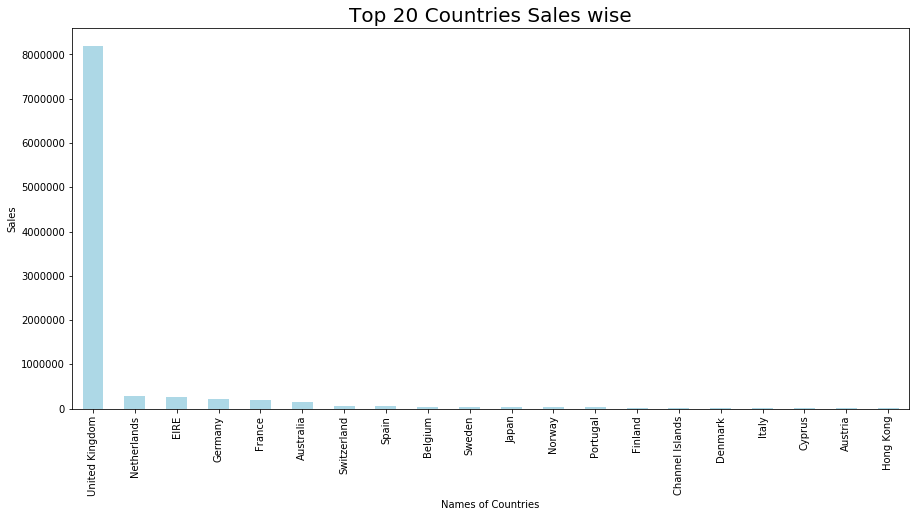

In [15]:
df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = False).head(20).plot.bar(figsize = (15, 7), color = 'lightblue')
plt.title('Top 20 Countries Sales wise', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Sales')
plt.show()

#### Bottom 20 countries sales wise

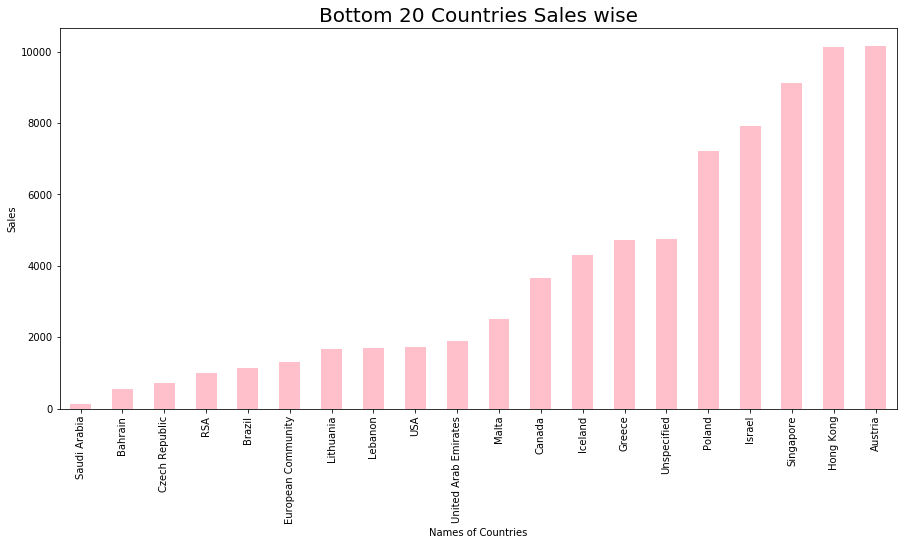

In [16]:
df['Sales'].groupby(df['Country']).agg('sum').sort_values(ascending = True).head(20).plot.bar(figsize = (15, 7), color = 'pink')
plt.title('Bottom 20 Countries Sales wise', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Sales')
plt.show()

#### Adding 4 more columns (Dates,Time,Month,Year) to dataset for better visualisation 

In [17]:
df['Dates'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.time

df['Year'] = pd.DatetimeIndex(df['Dates']).year
df['Month'] = pd.DatetimeIndex(df['Dates']).month

df['Time'] = df['Time'].apply(lambda Time:Time.hour)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Dates,Time,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30,2010-01-12,8,2010,1
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-01-12,8,2010,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00,2010-01-12,8,2010,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-01-12,8,2010,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34,2010-01-12,8,2010,1


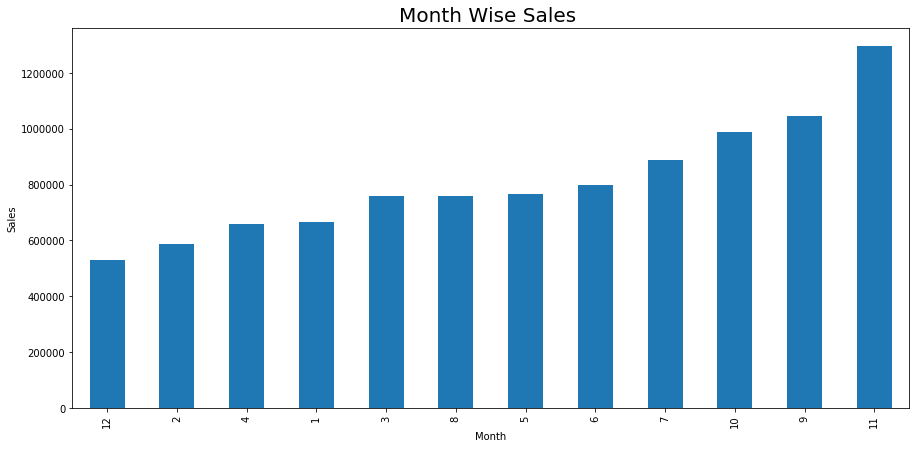

In [18]:
df['Sales'].groupby(df['Month']).sum().sort_values(ascending = True).plot.bar(figsize = (15, 7))
plt.title('Month Wise Sales ', fontsize = 20)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

### Hour Wise Sales

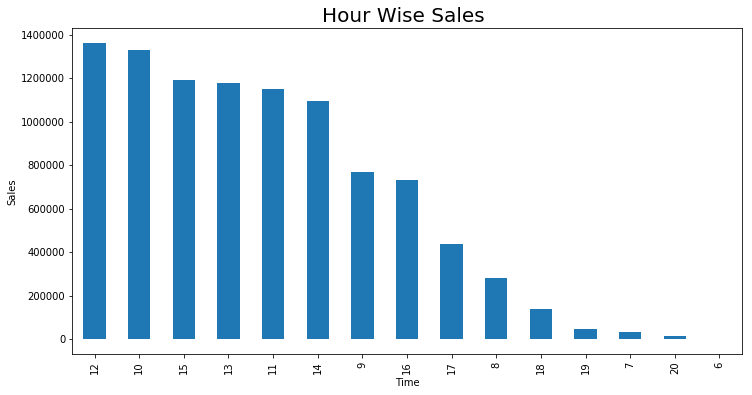

In [19]:
df['Sales'].groupby(df['Time']).sum().sort_values(ascending = False).plot.bar(figsize = (12, 6))
plt.title('Hour Wise Sales ', fontsize = 20)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

#### Most pupular StockCodes

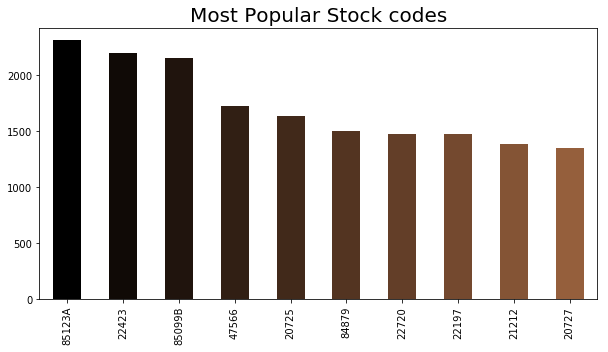

In [31]:
color = plt.cm.copper(np.linspace(0, 1, 20))
df['StockCode'].value_counts().head(10).plot.bar(color = color, figsize = (10, 5))
plt.title('Most Popular Stock codes', fontsize = 20)
plt.show()

#### Sorting Dataset by Sales Amount for better visualisation

In [21]:
df.sort_values(by = 'Sales')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Dates,Time,Year,Month
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,09-12-2011 09:27,2.08,16446.0,United Kingdom,-168469.60,2011-09-12,9,2011,9
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18-01-2011 10:17,1.04,12346.0,United Kingdom,-77183.60,2011-01-18,10,2011,1
222681,C556445,M,Manual,-1,10-06-2011 15:31,38970.00,15098.0,United Kingdom,-38970.00,2011-10-06,15,2011,10
524602,C580605,AMAZONFEE,AMAZON FEE,-1,05-12-2011 11:36,17836.46,NaN,United Kingdom,-17836.46,2011-05-12,11,2011,5
43702,C540117,AMAZONFEE,AMAZON FEE,-1,05-01-2011 09:55,16888.02,NaN,United Kingdom,-16888.02,2011-05-01,9,2011,5
43703,C540118,AMAZONFEE,AMAZON FEE,-1,05-01-2011 09:57,16453.71,NaN,United Kingdom,-16453.71,2011-05-01,9,2011,5
15016,C537630,AMAZONFEE,AMAZON FEE,-1,07-12-2010 15:04,13541.33,NaN,United Kingdom,-13541.33,2010-07-12,15,2010,7
16356,C537651,AMAZONFEE,AMAZON FEE,-1,07-12-2010 15:49,13541.33,NaN,United Kingdom,-13541.33,2010-07-12,15,2010,7
16232,C537644,AMAZONFEE,AMAZON FEE,-1,07-12-2010 15:34,13474.79,NaN,United Kingdom,-13474.79,2010-07-12,15,2010,7
524601,C580604,AMAZONFEE,AMAZON FEE,-1,05-12-2011 11:35,11586.50,NaN,United Kingdom,-11586.50,2011-05-12,11,2011,5


#### sorting the datset by unit price

In [22]:
df.sort_values(by = 'UnitPrice').head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Dates,Time,Year,Month
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,NaN,United Kingdom,-11062.06,2011-12-08,14,2011,12
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,NaN,United Kingdom,-11062.06,2011-12-08,14,2011,12
40984,539750,22652,TRAVEL SEWING KIT,1,21-12-2010 15:40,0.00,NaN,United Kingdom,0.00,2010-12-21,15,2010,12
52217,540696,84562A,NaN,1,11-01-2011 09:14,0.00,NaN,United Kingdom,0.00,2011-11-01,9,2011,11
52262,540699,POST,NaN,1000,11-01-2011 09:32,0.00,NaN,United Kingdom,0.00,2011-11-01,9,2011,11
344867,567113,85215,Damaged,-29,16-09-2011 13:39,0.00,NaN,United Kingdom,-0.00,2011-09-16,13,2011,9
204945,554696,85016,NaN,5,25-05-2011 17:14,0.00,NaN,United Kingdom,0.00,2011-05-25,17,2011,5
104419,545176,18098C,PORCELAIN BUTTERFLY OIL BURNER,6,28-02-2011 14:19,0.00,NaN,United Kingdom,0.00,2011-02-28,14,2011,2
104418,545176,20615,BLUE POLKADOT PASSPORT COVER,3,28-02-2011 14:19,0.00,NaN,United Kingdom,0.00,2011-02-28,14,2011,2
115488,546124,35610C,Thrown away.,-1121,09-03-2011 14:50,0.00,NaN,United Kingdom,-0.00,2011-09-03,14,2011,9


## Insight and Summary

By Looking After the data the company is a Multinational Ecommerce Company. Who are selling the Products like toys , head phones , stationary items like board , women fashion items , jewelry , kitchen items , Napkins and etc. 

##### Insights from Data

<div class="alert alert-block alert-warning">
<ul>

    * This is a dataset of all the transactions between  Dec 2010 and June 2011.

    * The company mainly sells occasional gifts which are unique and Most of the customers are wholesalers as per trend.

    * UK has the most customer Base that implies this online store is based out of UK.

    * Germany, France and Ireland are top 3 countries where online retail is working but it’s very low in comparison to UK.

    * WHITE HANGING HEART T-LIGHT HOLDER tops the most sold items follwed by REGENCY CAKESTAND 3 TIER and JUMBO BAG RED RETROSPOT.

    * There are significant number of cancelled orders.

    * September to December the sale is high in comparison to other months of the year. November is the peak season. Reason can be due to fall festivals like (christmas, New year, Thanksgiving, Halloween)

    * From 10:00 hrs to 15:00 hrs generate the most of sales during the day. This implicates the behavior of the customers, major section id active during the office hours.

    * Tuesday’s and Thursday’s are the days where more Total Sale is happening in comparison to other weekdays. Saturday seems to be off for orders.
    * Since customer base in other countries is much less which implies that those customers might be immigrants to UK from those countries.


</ul>
</div>




#### Scope for Improvement

<div class="alert alert-block alert-warning">
<ul>
    
    * Most of the sale is happening in UK and we can Improve the sale in other countries
    * sale is quite high on the week days predominantly Thursday, Wednesday, Monday and Friday comparing with other days of the week we need to concentrate on Saturday and Sunday sale in top performing Countries
    * Month Beginning has less sale comparatively with other days
    * Increase in sales can be done by advertising,promotional offers, discounts coupons ,loyality programs or any such additional offers.
    * Number of cancellations or returns are high which implies customer is not satisfied with the product in terms on one of the following
            * Missing timely Delivery
            * Quality of the Product is not as per customer expectations.
            * Less price offered by competitors for the same product
            * Product damages while shipping etc.
    * The company needs to focus on the above faults and get them corrected to minimize their orders getting cancelled.
    * The company can tie up with local stores for fast and timely delivery and increase customer satisfaction.
    * The company can find the other popular online stores in these countries and try to acquire them or tie up with them to promote your brand.

  
 </ul>
</div>

#### Further Uses Cases

<div class="alert alert-block alert-warning">
<ul>

    * Recommendations : We can analyse the  customer trends in buying one or more items and recommend the similar products to other customers. Eg: Amazon Recommendations.
    * Can Analyse the Repeat Customer and their intent Towards the Product and personalization.
    * Can analyse the customer trend on popular products and do better inventory management.
    * Can identify outdated items and replace them with alternate trending items.
    * Can Analyse the Product Availability and show case the demand forecast based on the product.
    
</ul>
</div>